In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## TÌM HIỂU DỮ LIỆU

In [2]:
path = 'C:/Users/nguye/OneDrive/Code/revise_knowledge/dataset/sub_data/bmw.csv'
df = pd.read_csv(path)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [3]:
df.shape

(10781, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [6]:
tmp = df.corr()
tmp

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


In [7]:
df.model.unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

In [8]:
df.transmission.unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [9]:
df.fuelType.unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric'], dtype=object)

In [10]:
df.describe(include='object')

,model,transmission,fuelType
count,10781,10781,10781
unique,24,3,5
top,3 Series,Semi-Auto,Diesel
freq,2443,4666,7027


In [11]:
df.engineSize.unique()

array([2. , 3. , 1.5, 0.6, 1.6, 4.4, 0. , 2.2, 2.5, 4. , 3.2, 1. , 5. ,
       1.9, 6.6, 2.8, 3.5])

## TIỀN XỬ LÝ DỮ LIỆU

### Visualization data

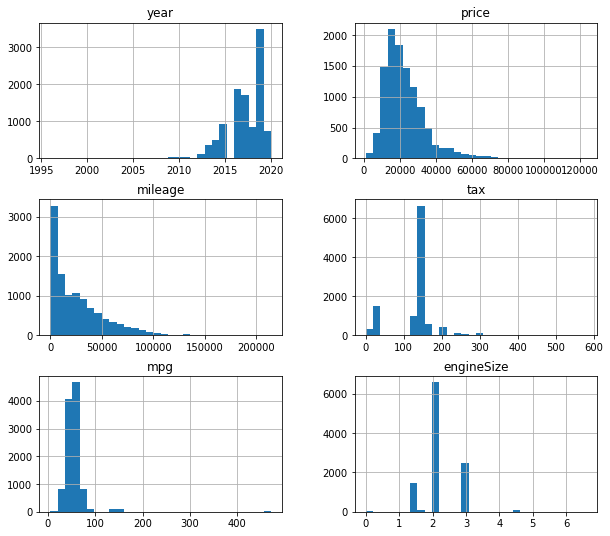

In [12]:
df.hist(bins = 30,figsize=(10,9))
plt.show()

<AxesSubplot:xlabel='tax', ylabel='price'>

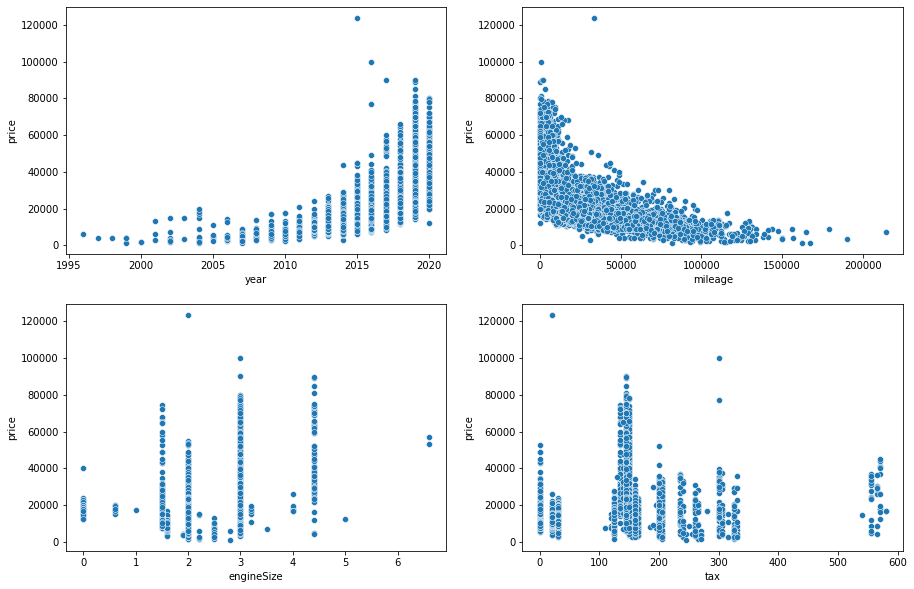

In [13]:
fig,ax = plt.subplots(2,2,figsize = (15,10))
sns.scatterplot(x = df['year'],y = df['price'],ax = ax[0,0])
sns.scatterplot(x = df['mileage'],y = df['price'],ax = ax[0,1])
sns.scatterplot(x = df['engineSize'],y = df['price'],ax = ax[1,0])
sns.scatterplot(x = df['tax'],y = df['price'],ax = ax[1,1])

<AxesSubplot:xlabel='tax'>

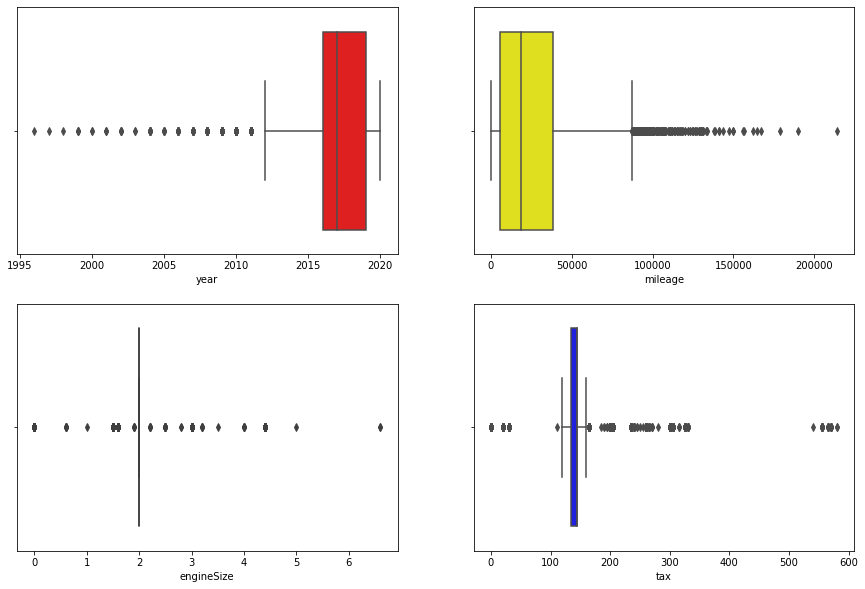

In [14]:
fig,ax = plt.subplots(2,2,figsize = (15,10))
sns.boxplot(x = df['year'],ax = ax[0,0],color='red')
sns.boxplot(x = df['mileage'],ax = ax[0,1],color='yellow')
sns.boxplot(x = df['engineSize'],ax = ax[1,0])
sns.boxplot(x = df['tax'],ax = ax[1,1],color='blue')

<AxesSubplot:xlabel='transmission', ylabel='price'>

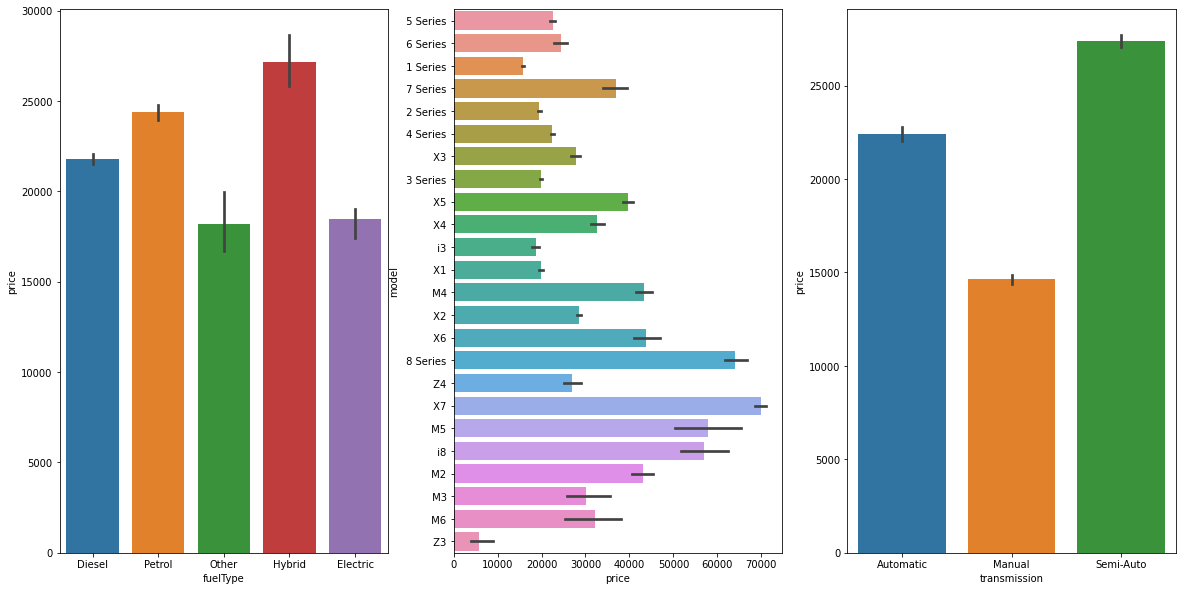

In [15]:
fig,ax = plt.subplots(1,3,figsize = (20,10))
sns.barplot(x = df['fuelType'], y = df['price'],ax = ax[0])
sns.barplot(y = df['model'],x = df['price'],ax = ax[1])
sns.barplot(x = df['transmission'],y = df['price'],ax = ax[2])

<AxesSubplot:xlabel='transmission', ylabel='count'>

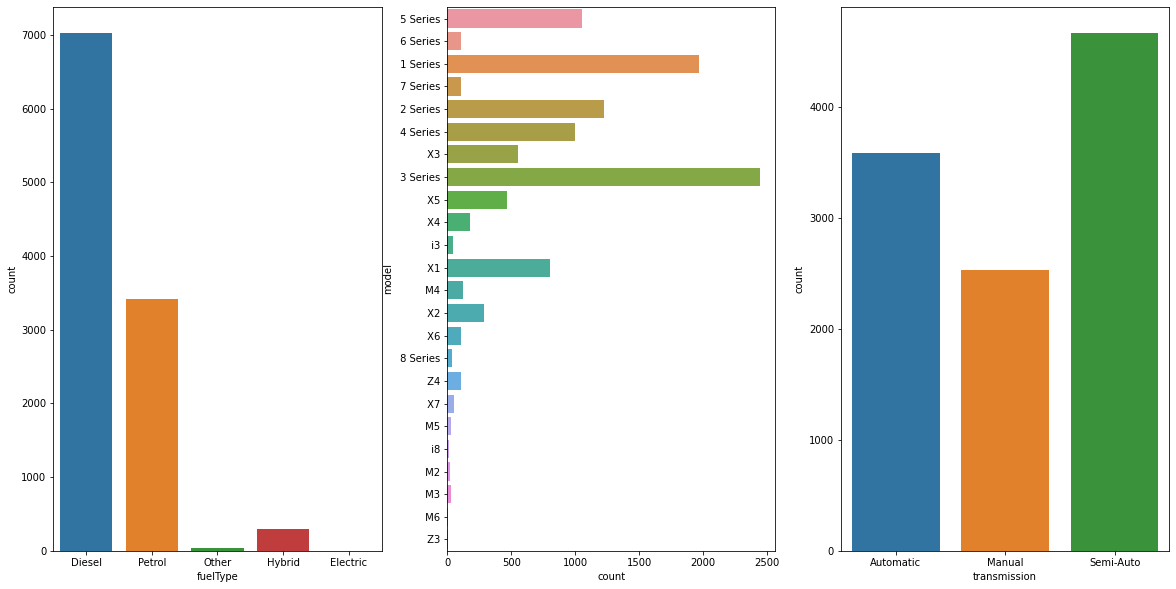

In [16]:
fig,ax = plt.subplots(1,3,figsize = (20,10))
sns.countplot(x = df['fuelType'],ax = ax[0])
sns.countplot(y = df['model'],ax = ax[1])
sns.countplot(x = df['transmission'],ax = ax[2])

In [17]:
tmp = df.corr()
tmp.style.background_gradient()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


### Xử lý dữ liệu bị khuyết

### Xử lý outlier

In [18]:
def cesoring(data,col):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    lower = data[col].quantile(0.25) - (IQR*1.5)
    upper = data[col].quantile(0.75) + (IQR*1.5)
    return lower,upper
def replace_(data,col,lower,upper):
    return np.where(data[col] > upper,upper,np.where(data[col] < lower,lower,data[col]))

In [19]:
lower_year,upper_year = cesoring(df,'year')
lower_mileage,upper_mileage = cesoring(df,'mileage')
lower_tax,upper_tax = cesoring(df,'tax')

In [20]:
df['year'] = replace_(df,'year',lower_year,upper_year)
df['mileage'] = replace_(df,'mileage',lower_mileage,upper_mileage)
df['tax'] = replace_(df,'tax',lower_tax,upper_tax)

<AxesSubplot:xlabel='tax'>

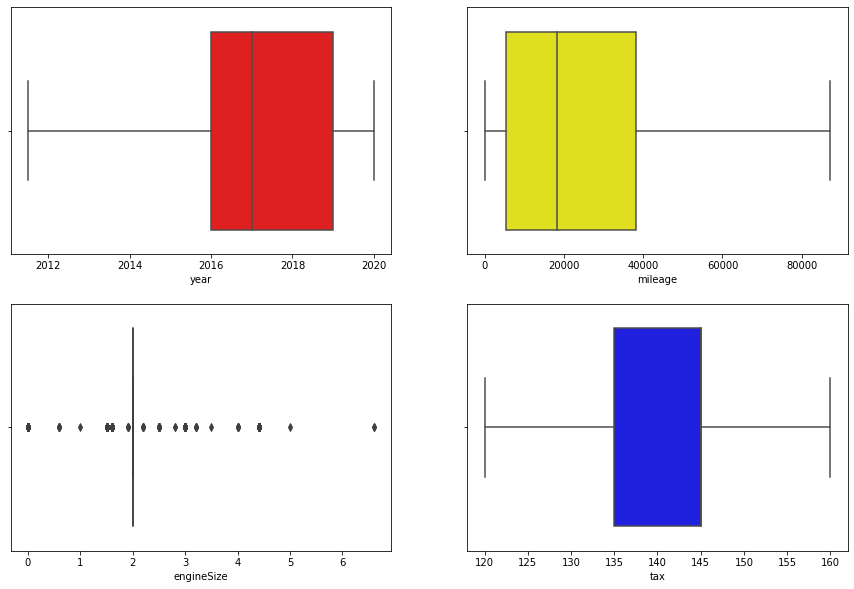

In [21]:
fig,ax = plt.subplots(2,2,figsize = (15,10))
sns.boxplot(x = df['year'],ax = ax[0,0],color='red')
sns.boxplot(x = df['mileage'],ax = ax[0,1],color='yellow')
sns.boxplot(x = df['engineSize'],ax = ax[1,0])
sns.boxplot(x = df['tax'],ax = ax[1,1],color='blue')

### Mã hóa dữ liệu

In [22]:
df_encoding = df.copy()

In [23]:
numberics = [col for col in df_encoding.columns if df_encoding[col].dtype != 'O' and col != 'price']
categorical = [col for col in df_encoding.columns if df_encoding[col].dtype == 'O']
print(numberics)
print()
print(categorical)

['year', 'mileage', 'tax', 'mpg', 'engineSize']

['model', 'transmission', 'fuelType']


In [24]:
from feature_engine.encoding import OneHotEncoder

In [25]:
encoder = OneHotEncoder(drop_last=True,variables=categorical)
df_encoding = encoder.fit_transform(df_encoding)

In [26]:
df_encoding.head()

,year,price,mileage,tax,mpg,engineSize,model_ 5 Series,model_ 6 Series,model_ 1 Series,model_ 7 Series,...,model_ i8,model_ M2,model_ M3,model_ M6,transmission_Automatic,transmission_Manual,fuelType_Diesel,fuelType_Petrol,fuelType_Other,fuelType_Hybrid
0,2014.0,11200,67068.0,125.0,57.6,2.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,2018.0,27000,14827.0,145.0,42.8,2.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016.0,16000,62794.0,160.0,51.4,3.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,2017.0,12750,26676.0,145.0,72.4,1.5,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,2014.0,14500,39554.0,160.0,50.4,3.0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


### Chia tập dữ liệu

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(df_encoding.drop('price',axis = 1),df_encoding['price'],test_size=0.2,random_state=1)

In [29]:
X_train.shape,X_test.shape

((8624, 34), (2157, 34))

In [30]:
X_train.head()

,year,mileage,tax,mpg,engineSize,model_ 5 Series,model_ 6 Series,model_ 1 Series,model_ 7 Series,model_ 2 Series,...,model_ i8,model_ M2,model_ M3,model_ M6,transmission_Automatic,transmission_Manual,fuelType_Diesel,fuelType_Petrol,fuelType_Other,fuelType_Hybrid
1321,2019.0,123.0,145.0,53.3,2.0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
7992,2018.0,23814.0,145.0,64.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4357,2016.0,46126.0,160.0,47.1,3.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2123,2019.0,6427.0,145.0,44.8,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8431,2015.0,27562.0,120.0,68.9,2.0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [31]:
X_test.head()

,year,mileage,tax,mpg,engineSize,model_ 5 Series,model_ 6 Series,model_ 1 Series,model_ 7 Series,model_ 2 Series,...,model_ i8,model_ M2,model_ M3,model_ M6,transmission_Automatic,transmission_Manual,fuelType_Diesel,fuelType_Petrol,fuelType_Other,fuelType_Hybrid
3840,2017.0,47717.0,160.0,42.8,3.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7757,2015.0,45000.0,160.0,51.4,3.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
10325,2016.0,41063.0,120.0,470.8,0.6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
685,2015.0,45000.0,120.0,72.4,1.5,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1947,2017.0,18099.0,145.0,57.6,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Chuẩn hóa dữ liệu

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scale = StandardScaler().fit(X_train[numberics])

In [34]:
X_train[numberics] = scale.transform(X_train[numberics])
X_test[numberics] = scale.transform(X_test[numberics])

### Lựa chọn đặc trưng

In [35]:
from feature_engine.selection import DropConstantFeatures,DropDuplicateFeatures
from sklearn.pipeline import Pipeline

In [36]:
pipe = Pipeline(
    [('constant',DropConstantFeatures(tol=0.998)),
     ('duplicated',DropDuplicateFeatures())]
).fit(X_train)

In [37]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [38]:
X_train.shape,X_test.shape

((8624, 31), (2157, 31))

In [39]:
X_train.head()

,year,mileage,tax,mpg,engineSize,model_ 5 Series,model_ 6 Series,model_ 1 Series,model_ 7 Series,model_ 2 Series,...,model_ Z4,model_ X7,model_ M5,model_ M3,transmission_Automatic,transmission_Manual,fuelType_Diesel,fuelType_Petrol,fuelType_Other,fuelType_Hybrid
1321,0.894496,-1.055023,0.277932,-0.095789,-0.30557,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
7992,0.415223,-0.053730,0.277932,0.257472,-0.30557,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4357,-0.543322,0.889279,1.474778,-0.296727,1.51359,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2123,0.894496,-0.788586,0.277932,-0.371268,-0.30557,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8431,-1.022595,0.104678,-1.716811,0.409795,-0.30557,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [41]:
paramter = {'alpha':[10,20]}
clf = GridSearchCV(Lasso(),paramter,cv = 10,scoring='neg_mean_squared_error').fit(X_train,y_train)

In [42]:
clf.best_params_

{'alpha': 10}

In [43]:
model = SelectFromModel(Lasso(clf.best_params_['alpha'])).fit(X_train,y_train)

In [44]:
features_selection = X_train.columns[model.get_support()]

In [45]:
X_train_lasso = X_train[features_selection]
X_test_lasso = X_test[features_selection]

In [46]:
X_train_lasso.shape,X_test_lasso.shape

((8624, 27), (2157, 27))

In [47]:
from feature_engine.selection import RecursiveFeatureAddition
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
paramter = {'learning_rate':[0.01,0.1,0.5],'n_estimators':[5,8,10,15],'max_depth':[3,5,10]}
clf = GridSearchCV(GradientBoostingRegressor(),paramter,cv = 10,scoring='neg_mean_squared_error').fit(X_train,y_train)

In [49]:
model = RecursiveFeatureAddition(
    GradientBoostingRegressor(learning_rate=clf.best_params_['learning_rate'],n_estimators=clf.best_params_['n_estimators']
                             ,max_depth=clf.best_params_['max_depth']),
    cv = 10,scoring = 'neg_mean_squared_error'
).fit(X_train,y_train)

In [50]:
model.features_to_drop_

['mileage',
 'tax',
 'model_ 6 Series',
 'model_ i3',
 'model_ M4',
 'transmission_Automatic',
 'fuelType_Petrol',
 'fuelType_Other',
 'fuelType_Hybrid']

<AxesSubplot:>

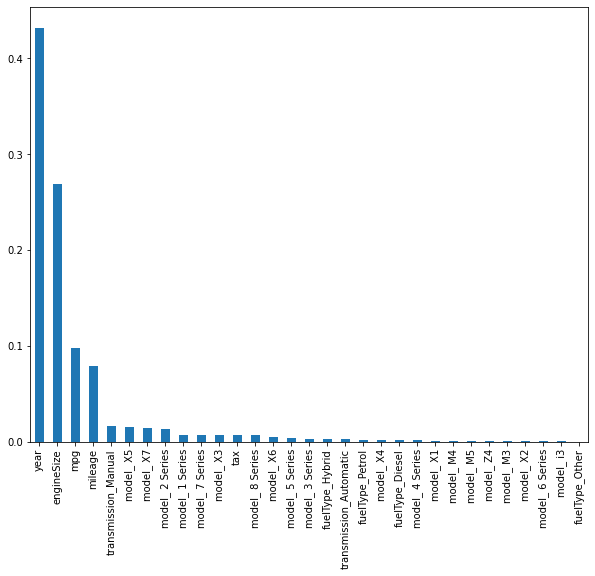

In [51]:
model.feature_importances_.plot.bar(figsize = (10,8))

In [52]:
X_train_add = model.transform(X_train)
X_test_add = model.transform(X_test)

In [53]:
X_train_add.shape,X_test_add.shape

((8624, 22), (2157, 22))

## HUẤN LUYỆN THUẬT TOÁN - ĐÁNH GIÁ - TỐI ƯU

In [54]:
from sklearn.model_selection import KFold,cross_val_score

In [55]:
def rmse(model,X,y):
    cv = KFold(n_splits=10,random_state=1,shuffle=True)
    score = cross_val_score(model,X,y,cv = cv,scoring='neg_mean_squared_error')
    score = np.sqrt(-score)
    print(f"Mean: {score.mean()} and std: {score.std()}")

In [56]:
from sklearn.linear_model import Ridge
rmse(Ridge(alpha=0.5),X_train,y_train)
rmse(Ridge(alpha=0.5),X_train_lasso,y_train)
rmse(Ridge(alpha=0.5),X_train_add,y_train)

Mean: 4025.796035125829 and std: 623.6922788677147
Mean: 4043.858387173305 and std: 626.2242787611814
Mean: 4546.965351281424 and std: 607.9704078266002


In [57]:
from sklearn.svm import SVR
rmse(SVR(),X_train,y_train)
rmse(SVR(),X_train_lasso,y_train)
rmse(SVR(),X_train_add,y_train)

Mean: 11216.705346380415 and std: 511.650753750705
Mean: 11200.667329307089 and std: 512.7104541700778
Mean: 11235.622007245662 and std: 509.5518986365214


In [58]:
from sklearn.tree import DecisionTreeRegressor
rmse(DecisionTreeRegressor(),X_train,y_train)
rmse(DecisionTreeRegressor(),X_train_lasso,y_train)
rmse(DecisionTreeRegressor(),X_train_add,y_train)

Mean: 3521.7193195658338 and std: 612.4461624109057
Mean: 3563.5588412075604 and std: 729.3149075522479
Mean: 3061.351207629751 and std: 637.1220929792061


In [59]:
from sklearn.ensemble import RandomForestRegressor
rmse(RandomForestRegressor(),X_train,y_train)
rmse(RandomForestRegressor(),X_train_lasso,y_train)
rmse(RandomForestRegressor(),X_train_add,y_train)

Mean: 2797.8733934474194 and std: 685.1498043339955
Mean: 2831.6050051373045 and std: 700.5048391084612
Mean: 2937.155770833615 and std: 641.3221296144563


In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
paramter = {'max_depth':[3,5,7,10,15]}
clf = GridSearchCV(model,paramter,cv = 10,scoring='neg_mean_squared_error').fit(X_train,y_train)

In [61]:
clf.best_params_

{'max_depth': 10}

In [62]:
model = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth']).fit(X_train,y_train)

In [63]:
from sklearn.metrics import mean_squared_error,r2_score

In [64]:
error = mean_squared_error(y_train,model.predict(X_train))
error

7173134.5177555205

In [65]:
error = mean_squared_error(y_test,model.predict(X_test))
error

9572761.87689217

In [66]:
y_pred = model.predict(X_test[:5])
print(y_pred)
print(list(y_test[:5]))

[33004.         18025.03333333 16785.23       12994.29891304
 19891.20661157]
[35470, 15490, 17000, 10991, 21050]


In [67]:
r2_score(y_test,model.predict(X_test))

0.9260337653327683